In [1]:
from data_describe.backends._backends import _get_compute_backend

c:\workspace\data-describe\data_describe\compat\_notebook.py:18: UserWarning: The extension "jupyterlab-plotly" was not found and is required for Plotly-based visualizations.
  f'The extension "{extension}" was not found and is required for Plotly-based visualizations.'


In [2]:
_get_compute_backend(None, [1,2,3])

set()


In [1]:
import data_describe as dd

In [2]:
from sklearn.datasets import load_wine
df = load_wine(as_frame=True).data

In [3]:
cl = dd.correlation_matrix(df, viz_backend="plotly")

In [4]:
!jupyter labextension check jupyterlab-plotly

jupyterlab-plotly:enabled 


In [6]:
association_matrix = df.corr()

In [12]:
import plotly.graph_objects as go
import numpy as np

In [17]:
fig = go.Figure(
        data=[
            go.Heatmap(
                z=np.flip(association_matrix.to_numpy(), axis=0),
                x=association_matrix.columns.values,
                y=association_matrix.columns.values[::-1],
                connectgaps=False,
                xgap=2,
                ygap=2,
#                 colorscale=cscale,
                colorbar={"title": "Strength"},
            )
        ],
        layout=go.Layout(
            autosize=False,
            title={
                "text": "Correlation Matrix",
            },
            xaxis=go.layout.XAxis(
                automargin=True, tickangle=270, ticks="", showgrid=False
            ),
            yaxis=go.layout.YAxis(automargin=True, ticks="", showgrid=False),
            plot_bgcolor="rgb(0,0,0,0)",
            paper_bgcolor="rgb(0,0,0,0)",
        ),
    )

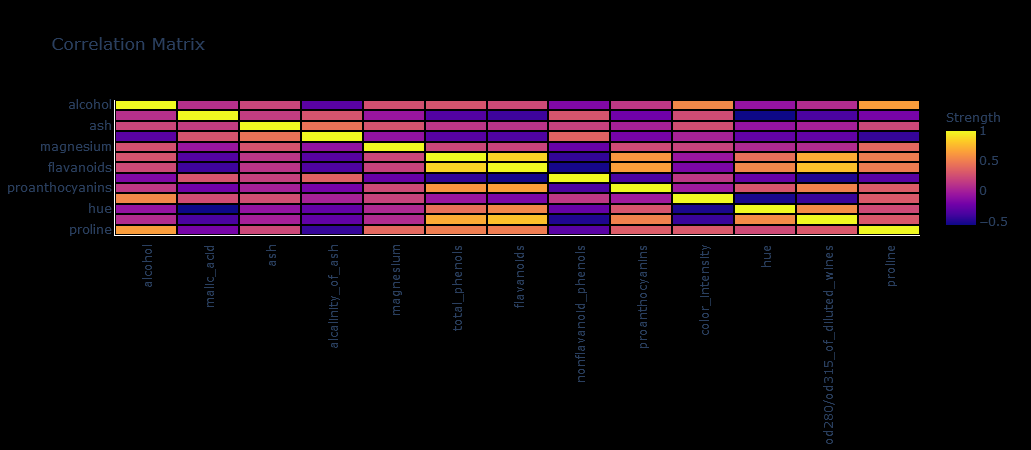

In [19]:
fig

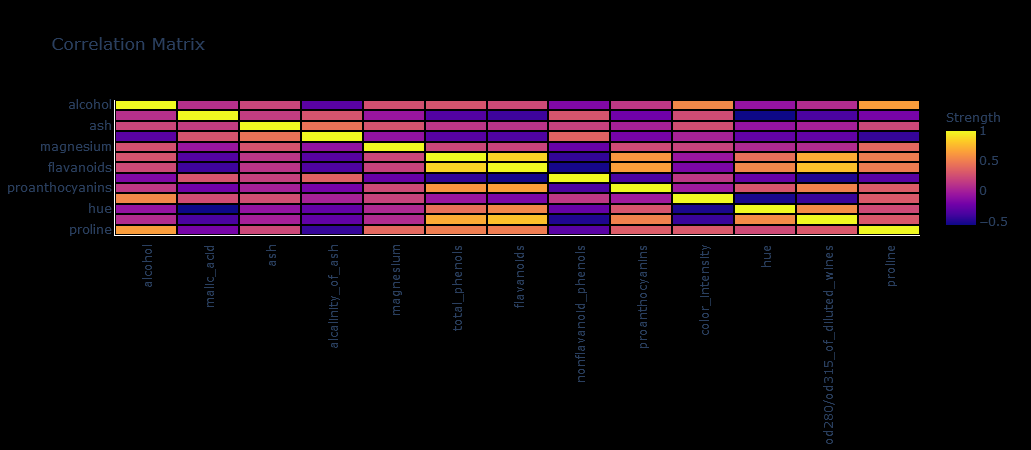

In [18]:
fig.show()

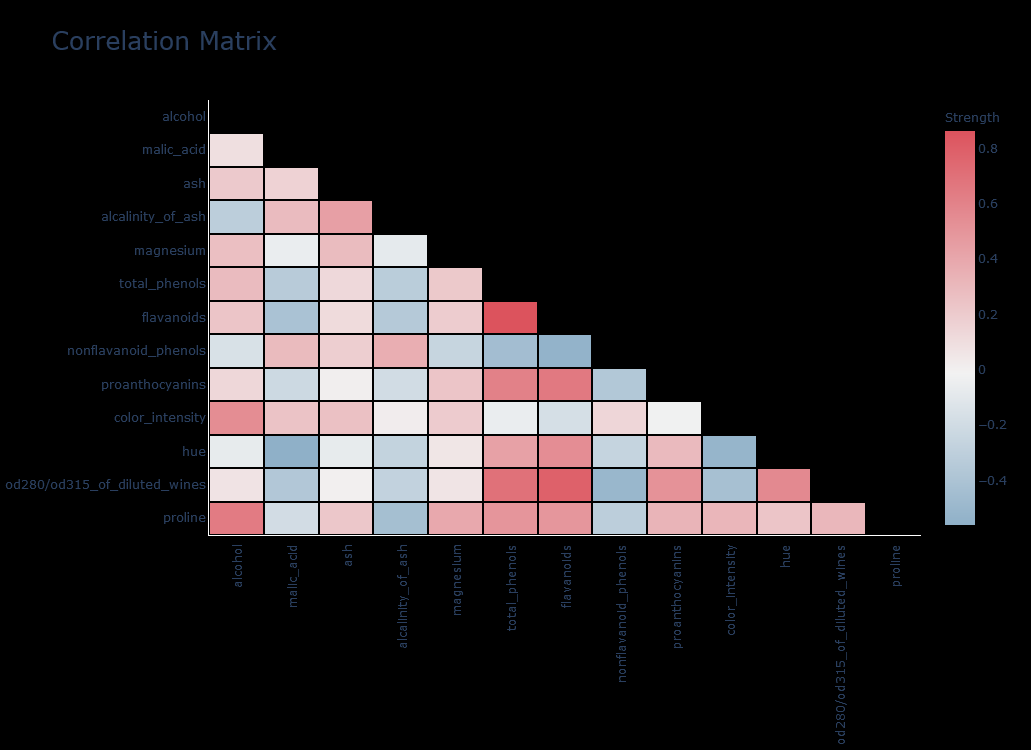

In [5]:
fig = cl.show()

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_wine
df = load_wine(as_frame=True).data

In [5]:
df.shape

(178, 13)

In [12]:
%%timeit
df.agg('mean', axis=0)

421 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
pd.DataFrame(np.mean(df.values, axis=0))

133 µs ± 918 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%%timeit
df.agg('min', axis=0)

369 µs ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
pd.DataFrame(np.min(df.values, axis=0))

115 µs ± 665 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit
df.agg('std', axis=0)

558 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%%timeit
pd.DataFrame(np.std(df.values, axis=0))

176 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
